In [70]:
import pandas as pd
from stridze.db import engine
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

records = pd.read_sql_table('record', engine)
laps = pd.read_sql_table('lap', engine)

/var/folders/8h/p7tllcw96sv_k_1rvz_4h51m0000gn/T/ipykernel_20563/2554007593.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2)


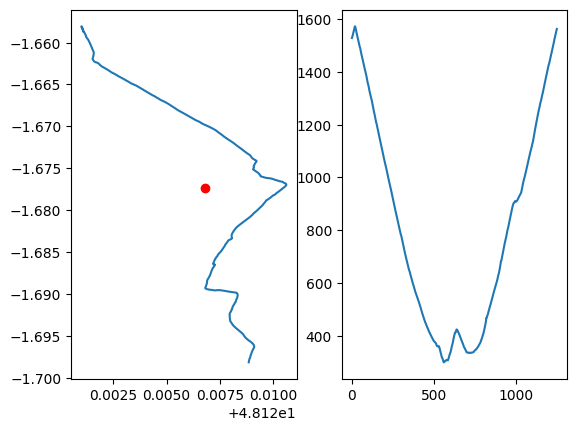

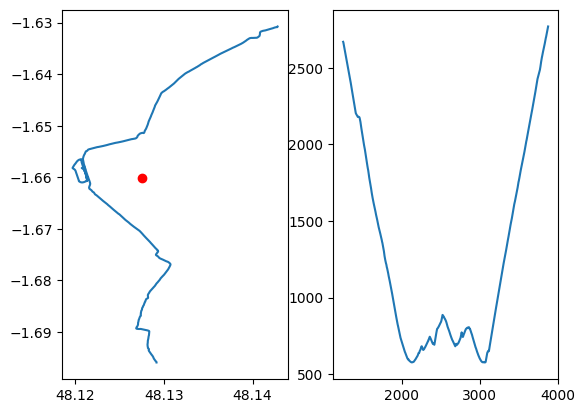

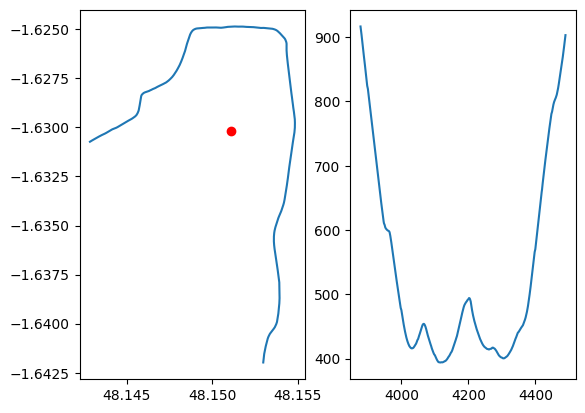

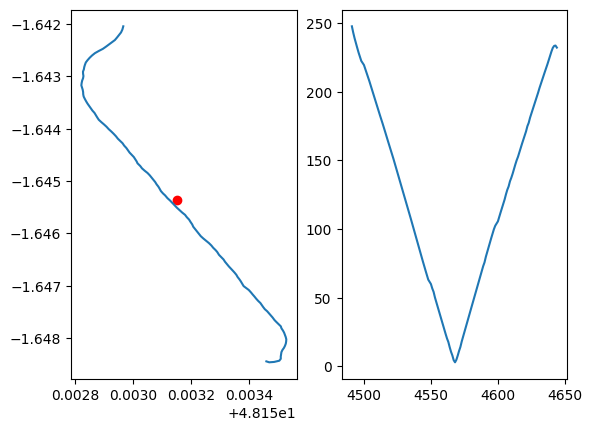

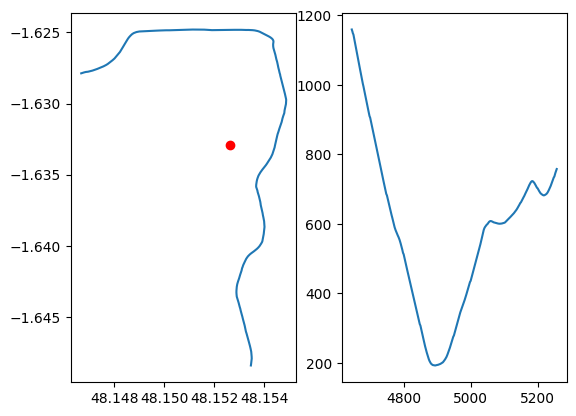

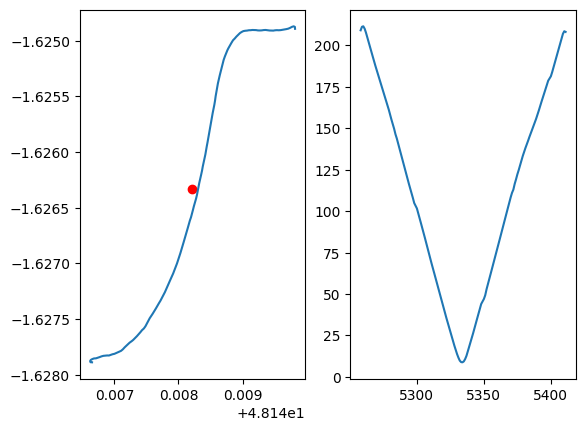

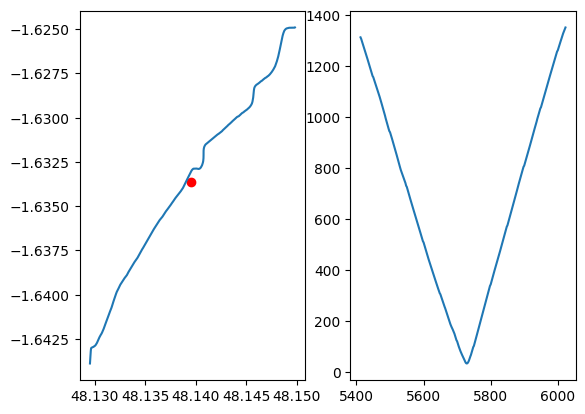

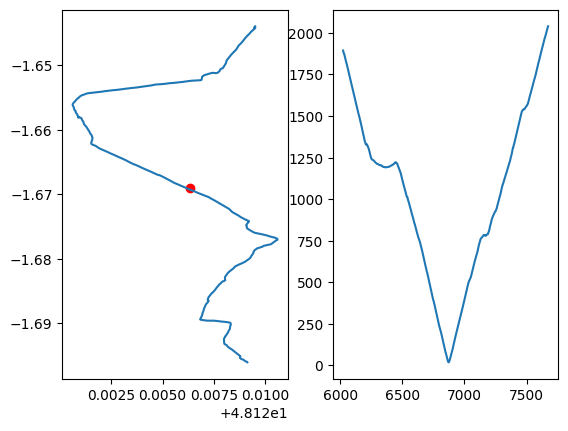

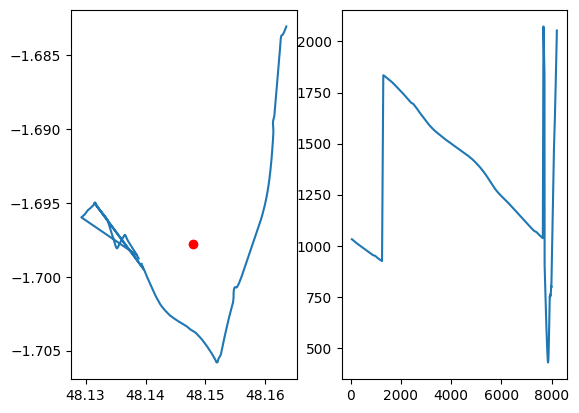

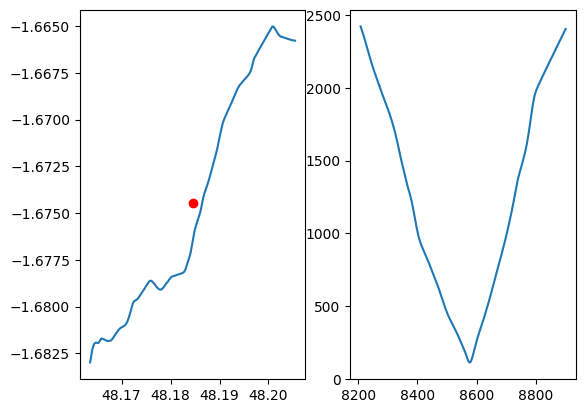

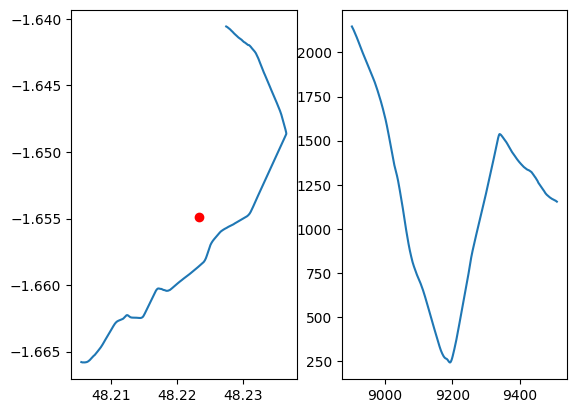

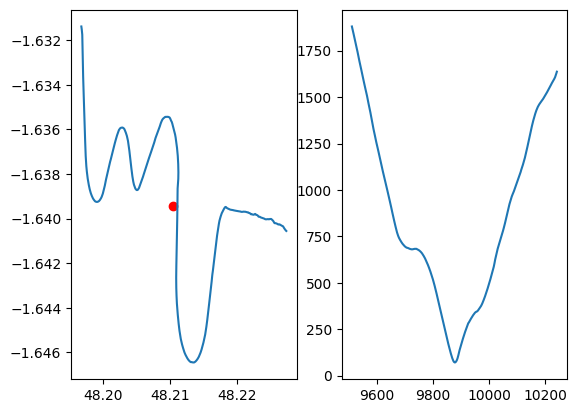

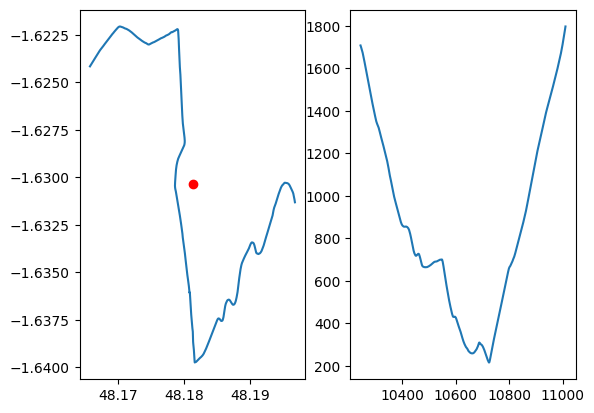

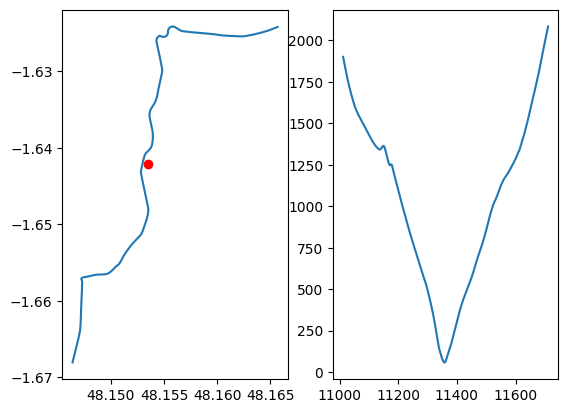

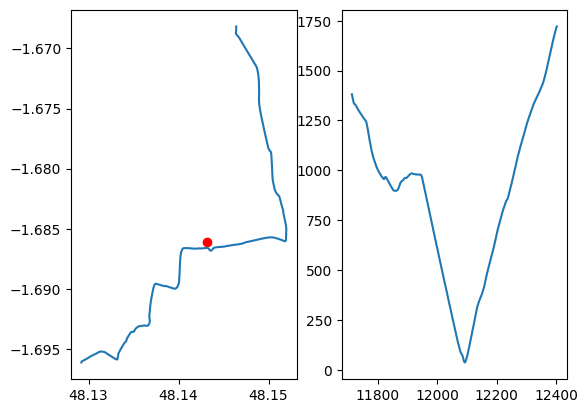

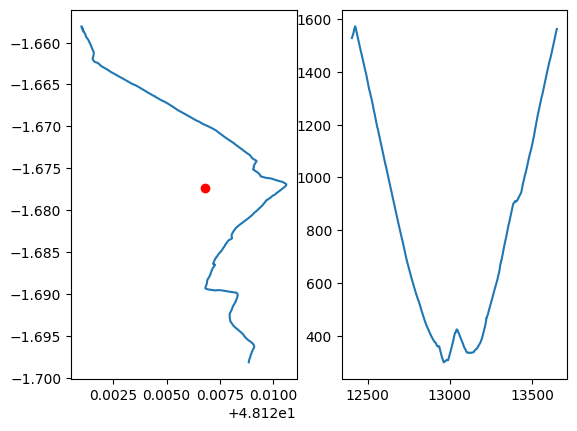

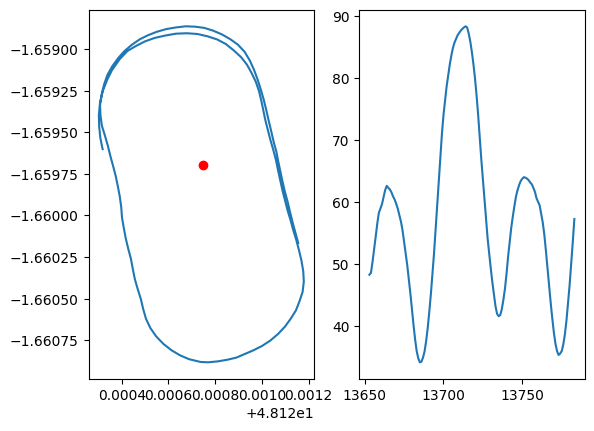

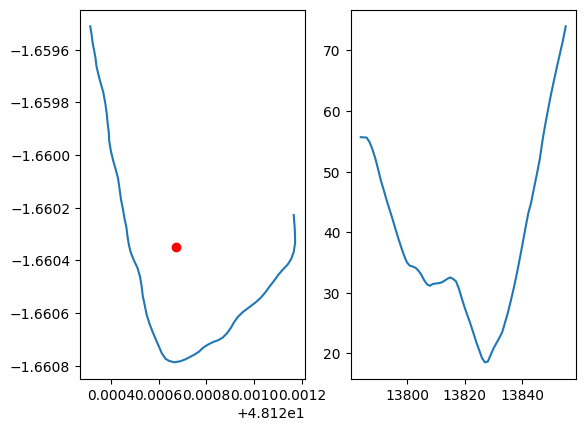

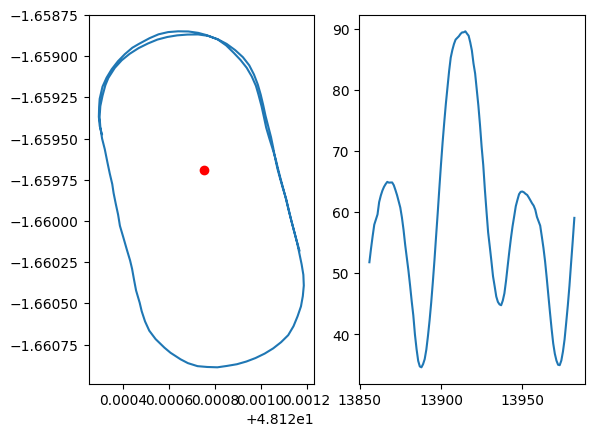

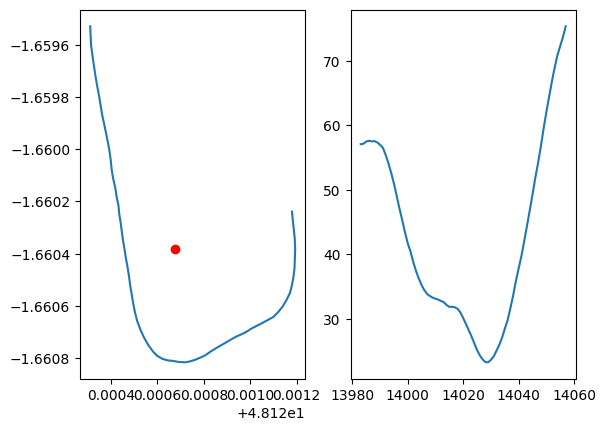

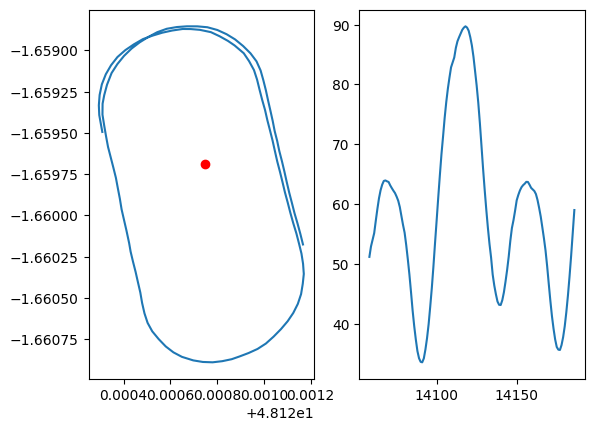

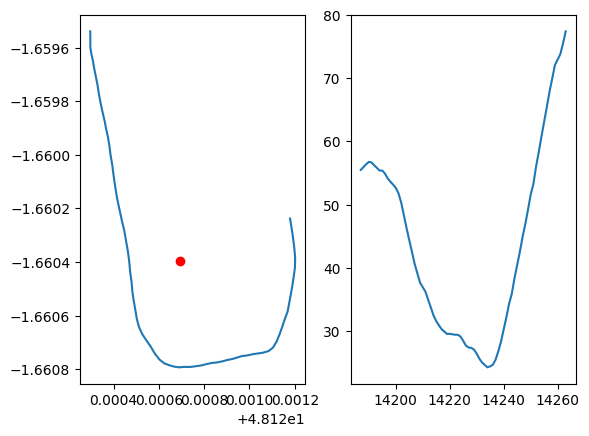

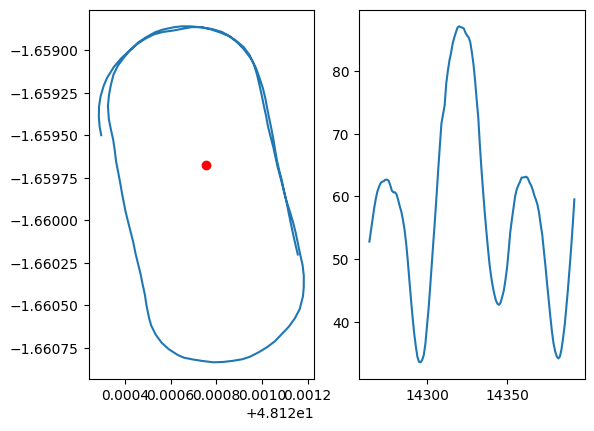

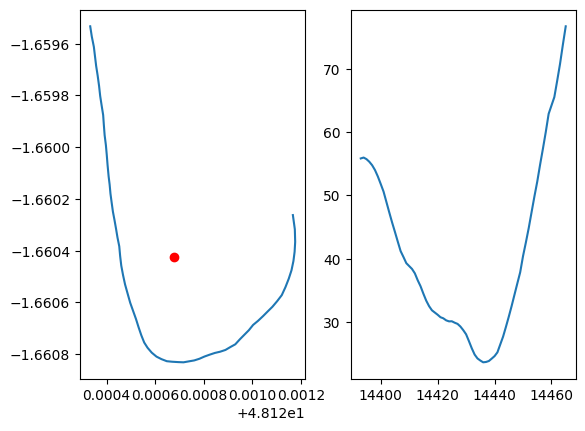

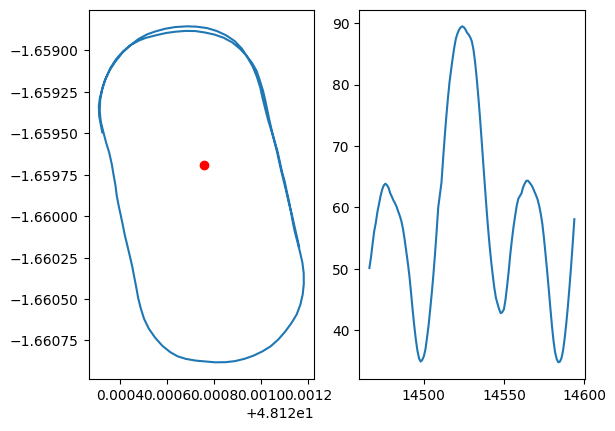

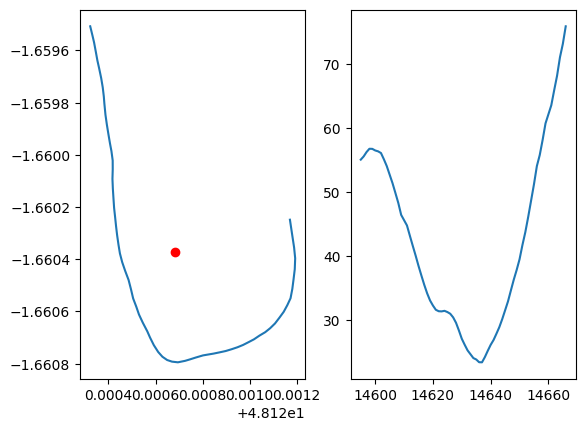

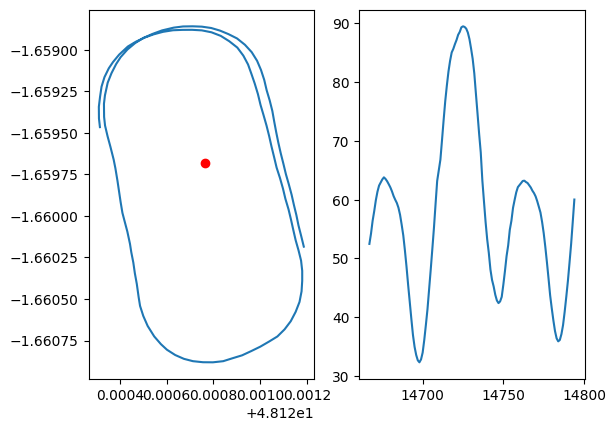

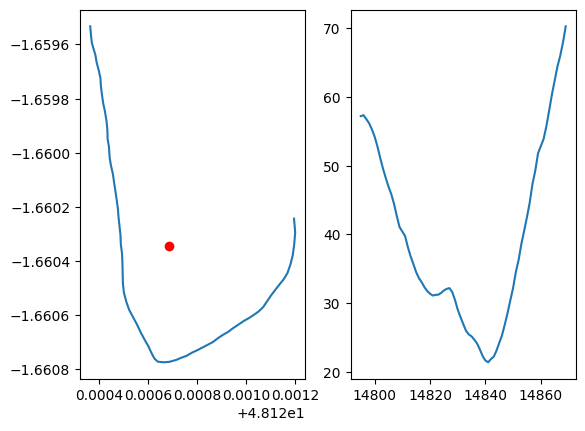

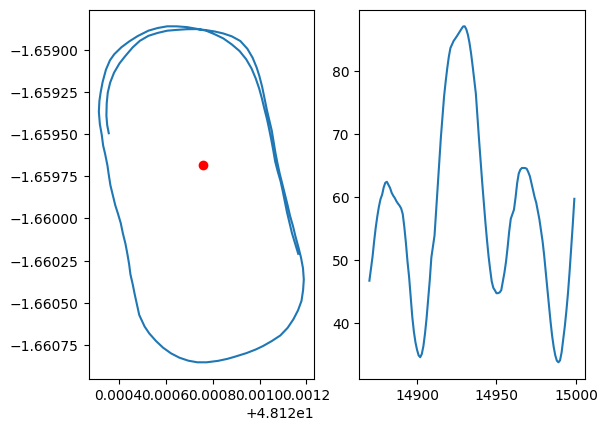

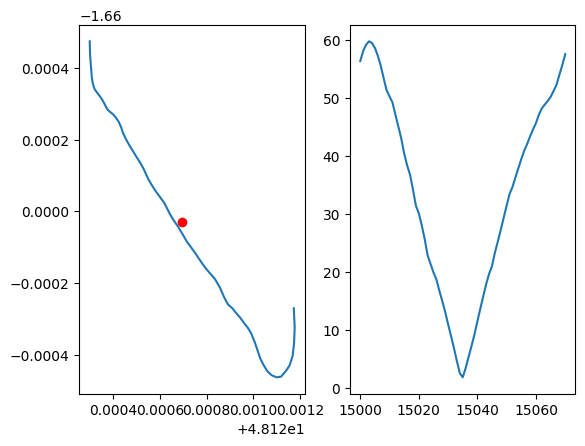

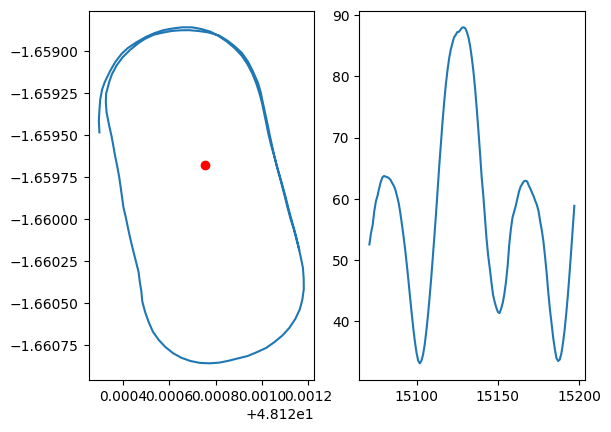

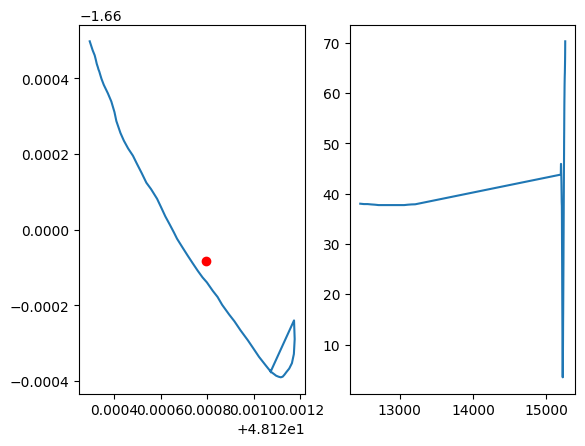

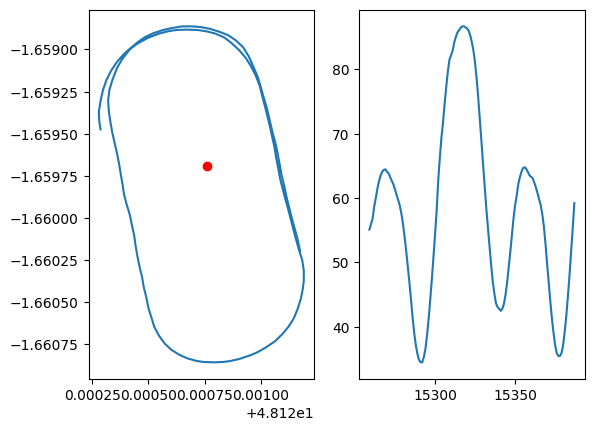

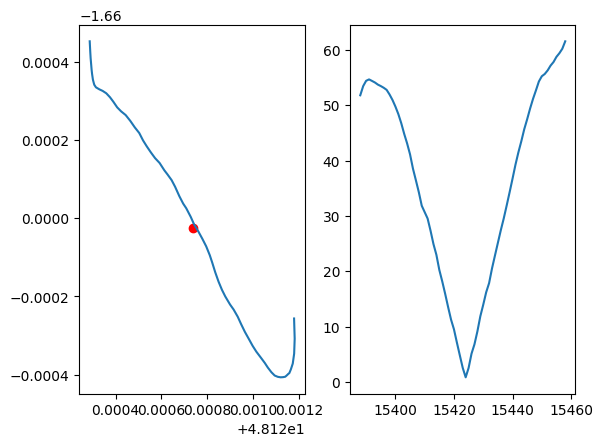

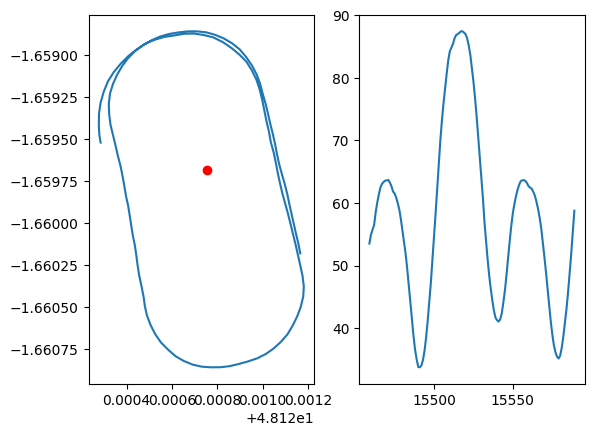

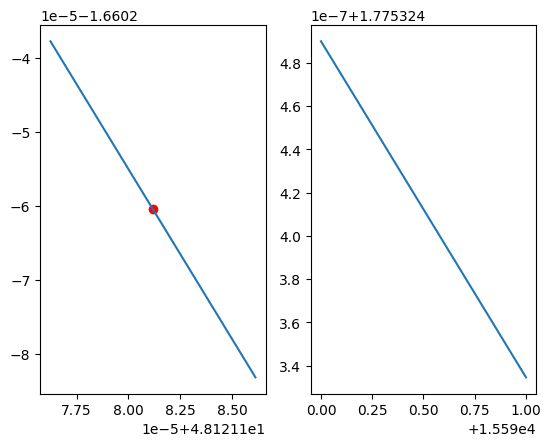

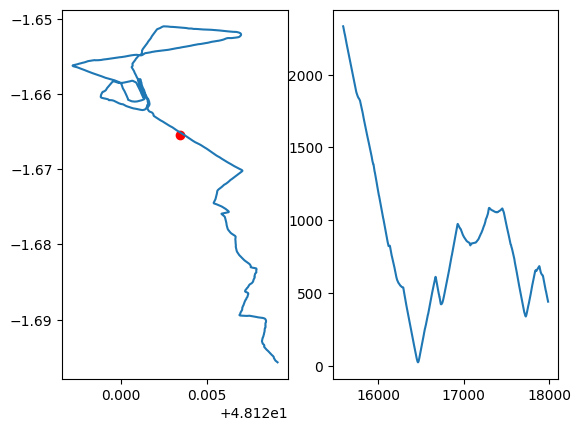

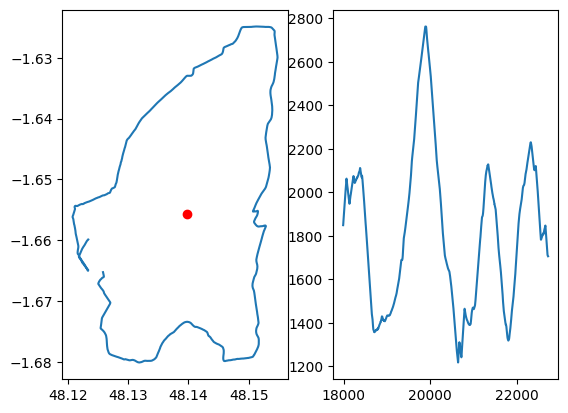

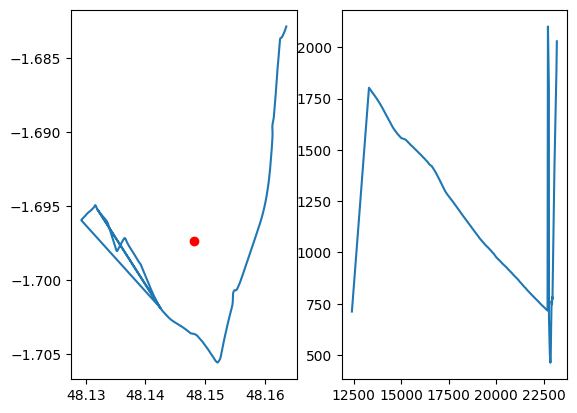

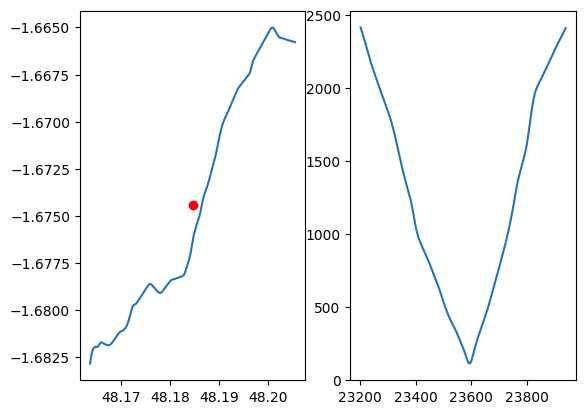

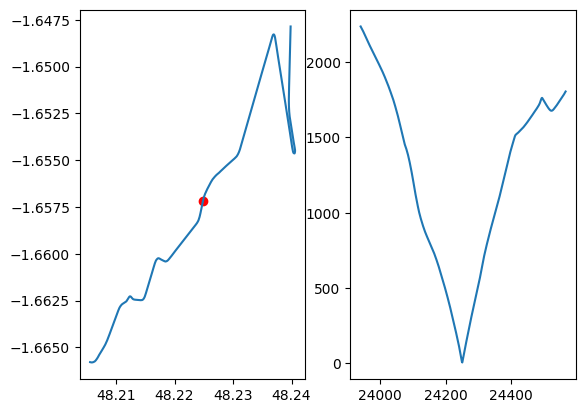

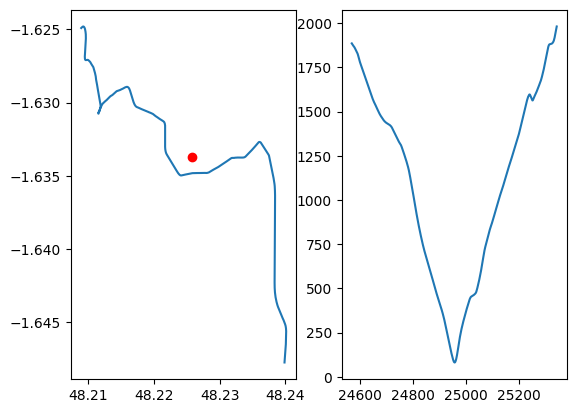

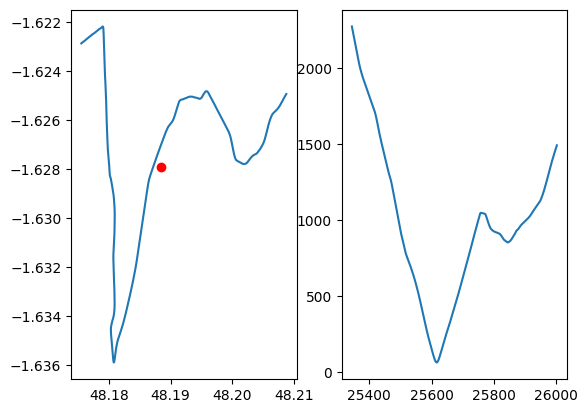

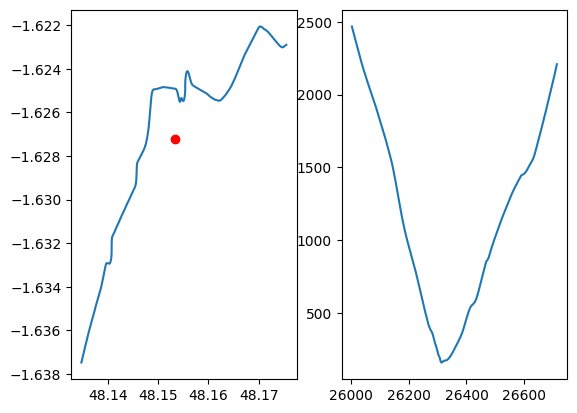

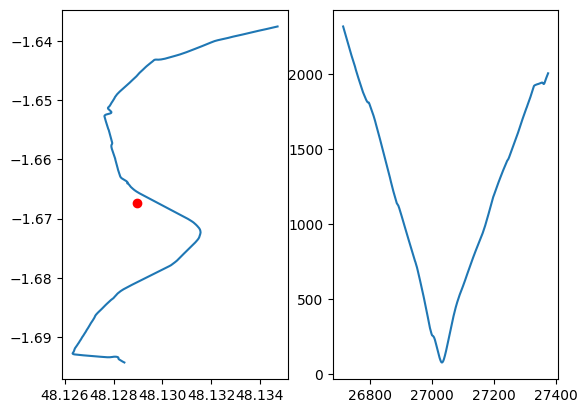

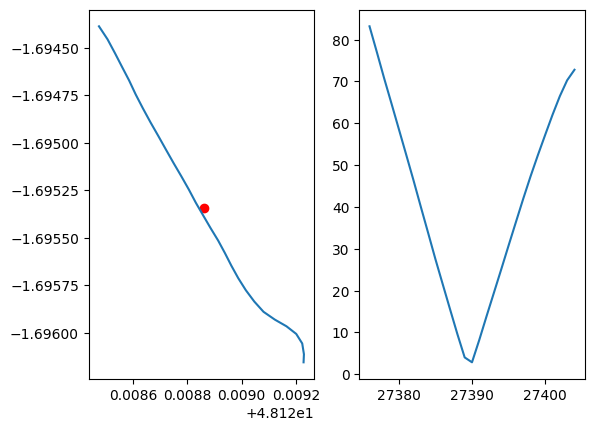

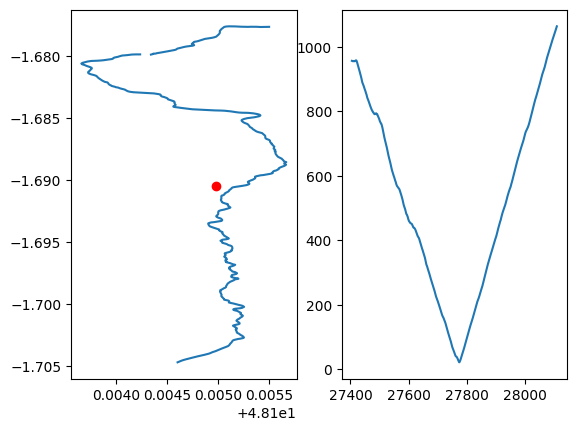

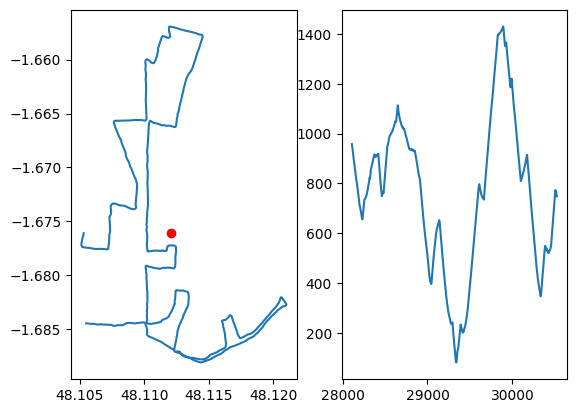

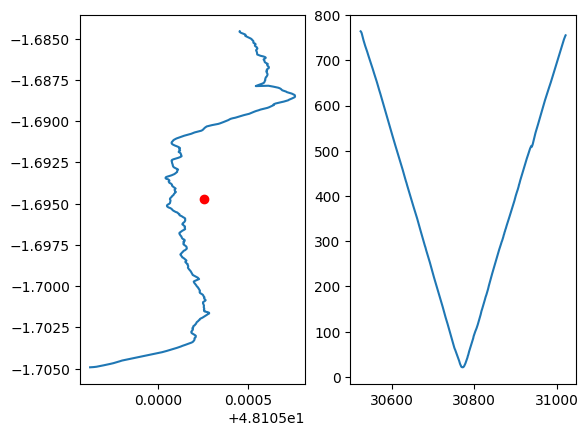

In [89]:
coef = 2**32 / 360
for idx, lap in laps.iterrows():
    record = records[records['lap_id'] == lap['id']]
    x, y = record[['position_lat', 'position_long']].mean() / coef

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(record['position_lat'] / coef, record['position_long'] / coef)
    ax1.scatter(x = record[['position_lat', 'position_long']].mean().position_lat / coef, y = record[['position_lat', 'position_long']].mean().position_long / coef, c = 'red')

    elt = record[['position_lat', 'position_long']].dropna().apply(lambda row: geodesic((x, y), (row[0] / coef, row[1] / coef)).meters, axis=1)
    elt.plot(ax=ax2)

In [84]:
lap

id                                           49
timestamp                   2023-10-08 09:10:24
start_time                  2023-10-08 08:58:12
start_position_lat                    573910475
start_position_long                   -20340394
                                   ...         
avg_right_pco                               NaN
avg_cadence_position                       None
max_cadence_position                       None
total_fractional_ascent                    0.13
total_fractional_descent                   0.07
Name: 48, Length: 77, dtype: object

In [82]:
record

,id,timestamp,position_lat,position_long,distance,enhanced_speed,enhanced_altitude,vertical_oscillation,stance_time_percent,stance_time,vertical_ratio,stance_time_balance,step_length,heart_rate,cadence,temperature,activity_type,fractional_cadence,lap_id
